Dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Resources: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/kernels

Path: employee/all.csv

\# Use this all.csv, for code trying. Later we will have train.csv and test.csv

# EDA


In [319]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.expand_frame_repr', False)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

In [320]:
url = "https://raw.githubusercontent.com/furkan-ozbudak/machine-learning/master/input.csv"
data = pd.read_csv(url)
print("ONE SAMPLE FROM DATASET:\n\n", data.head(20))

ONE SAMPLE FROM DATASET:

     Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0    41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2            Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                 

In [321]:
print("\nNUMBER OF EMPLOYEES FOLLOWED BY NUMBER OF FEATURES FOR EACH EMPLOYEE:\n")
print(data.shape)


NUMBER OF EMPLOYEES FOLLOWED BY NUMBER OF FEATURES FOR EACH EMPLOYEE:

(1470, 35)


In [322]:
print("\nNUMBER OF MISSING RECORDS IN EACH FEATURE:\n")
print(data.isnull().sum())


NUMBER OF MISSING RECORDS IN EACH FEATURE:

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany           

In [323]:
# Double check of missing data
print("\nDOUBLE CHECK TO SEE IF THERE IS ANY MISSING DATA:\n")
print(data.isnull().values.any())


DOUBLE CHECK TO SEE IF THERE IS ANY MISSING DATA:

False


In [324]:
"""
OUTLIER ANALYSIS:

SUSPECTIONS:

1- Monthly Income MAX                 (Max = $20,000   Upper Quartile = $8,300)
2- NumCompaniesWorked MAX             (Max = 9   Upper Quartile = 4)
3- StockOptionLevel MAX               (Max = 3   Upper Quartile = 1)
4- Total Working Years MAX            (Max = 40   Upper Quartile = 15)
5- Training Times Last Year MAX       (Max = 6  Upper Quartile = 3)
6- Years At Company 40 Years MAX      (Max = 40   Upper Quartile = 9)
7- Years In Current Role MAX          (Max = 18   Upper Quartile = 7)
8- Years Since Last Promotion MAX     (Max = 15   Upper Quartile = 3)
9- Years with Current Manager MAX     (Max = 7   Upper Quartile = 17)

CONCLUSION:

There is no such extreme outlier that we can confidentally say
it is wrong inputted so that we can remove.

"""
print("\nBASIC STATISTICS OF DATA:\n")
print(data.describe())



BASIC STATISTICS OF DATA:

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.923810   802.485714         

In [325]:
# Most columns are numerical. Few columns at the bottom are objects.
print("\nDATA TYPES OF FEATURES:\n")
print(data.columns.to_series().groupby(data.dtypes).groups)


DATA TYPES OF FEATURES:

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'), dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')}


In [326]:
# A more neat look to the columns
print("\nFINAL PERSPECTIVE TO THE FEATURES BEFORE VISUALIZATION:\n")
print(data.info())


FINAL PERSPECTIVE TO THE FEATURES BEFORE VISUALIZATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement      


TARGET DISTRIBUTION: 



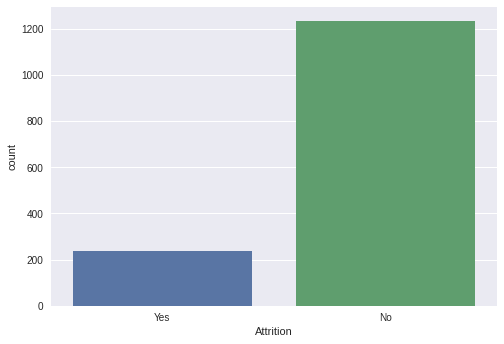

In [327]:
print("\nTARGET DISTRIBUTION: \n")
sns.countplot(data['Attrition'])


OVERALL DISTRIBUTION: 



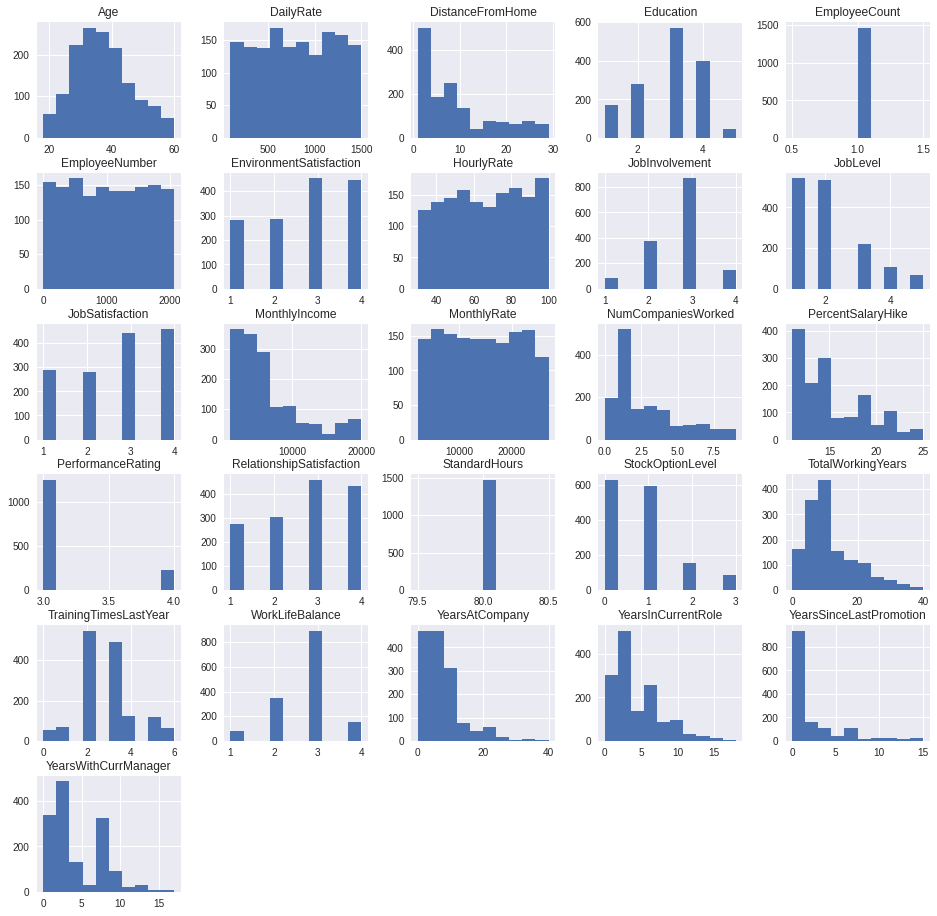

In [328]:
print("\nOVERALL DISTRIBUTION: \n")
data.hist(figsize=(16,16))
plt.show()


ATTRITION DISTRIBUTION ON DIFFERENT FEATURES PART 1: 


 X Axis = Feature Value 


 Y Axis = Count 


 Numbers on top of the bars represent the occurence percentage of whole population. 


 Label at the very bottom represents the feature name.



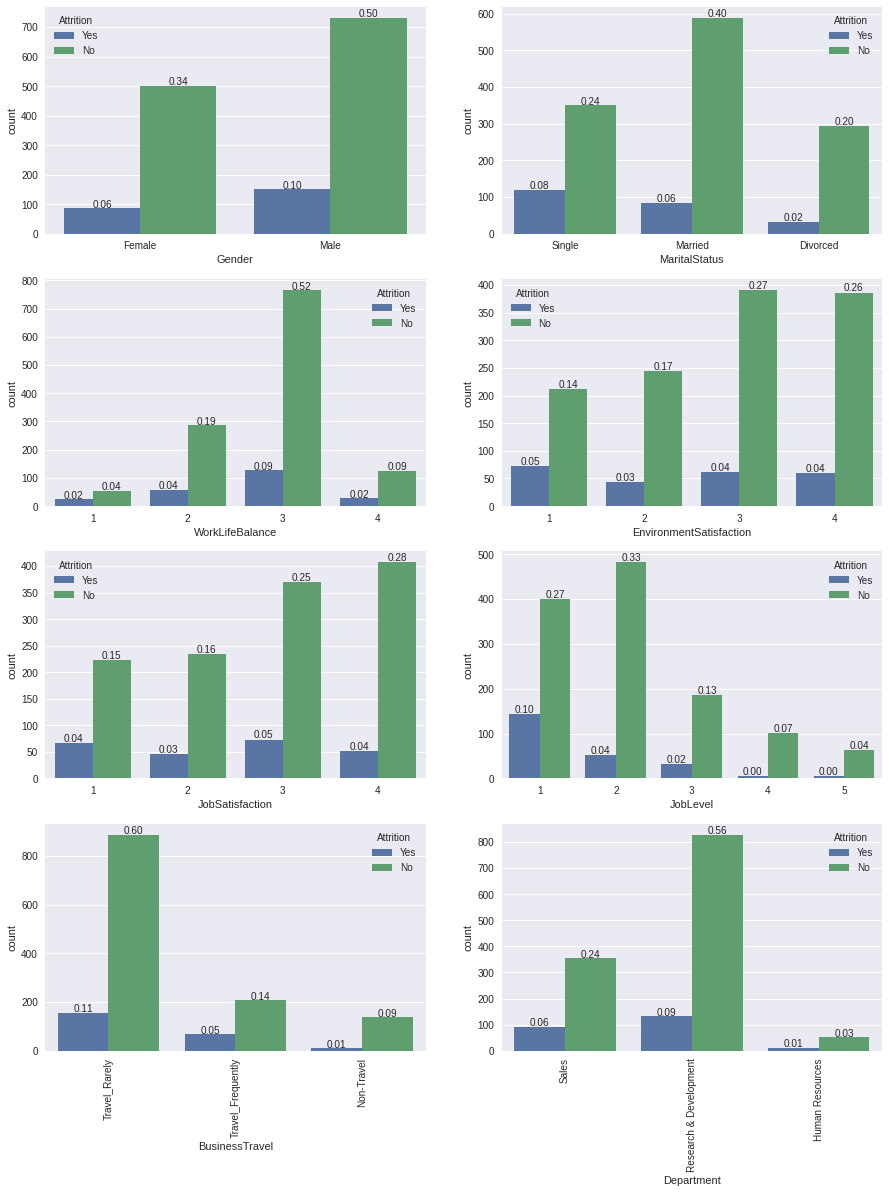

In [329]:
total_records= len(data)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(15,5))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=data,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

plt.subplots_adjust(bottom=-0.9, top=2)
print("\nATTRITION DISTRIBUTION ON DIFFERENT FEATURES PART 1: \n")
print("\n X Axis = Feature Value \n")
print("\n Y Axis = Count \n")
print("\n Numbers on top of the bars represent the occurence percentage of whole population. \n")
print("\n Label at the very bottom represents the feature name.\n")
plt.show()


ATTRITION DISTRIBUTION ON DIFFERENT FEATURES PART 2: 


 X Axis = Feature Value 


 Y Axis = Count 


 Numbers on top of the bars represent the occurence percentage of whole population. 


 Label at the very bottom represents the feature name.



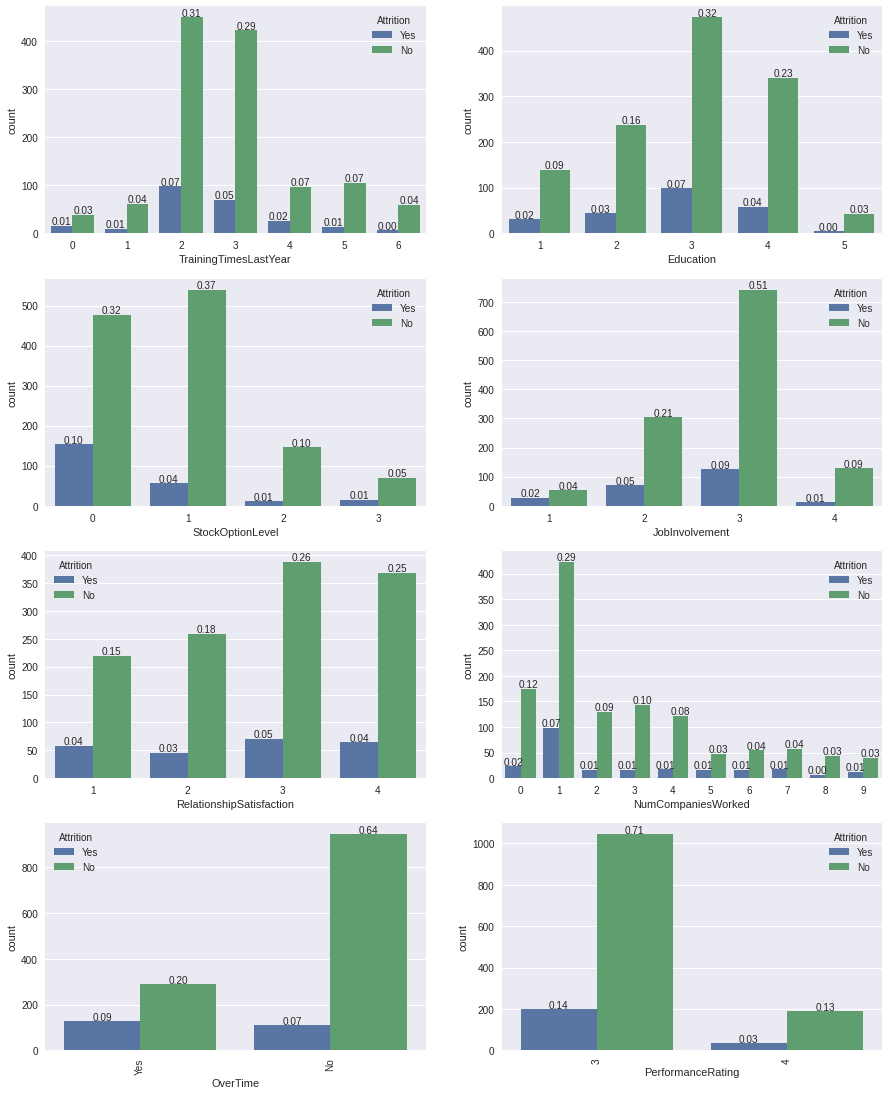

In [330]:
# Attrition Analysis On More Features
# X = Feature
# Y = Count
# Z = Percent of Population (E.G: 0.34 equals 34% or 0.06 equals 6%)

total_records= len(data)
columns = ["TrainingTimesLastYear","Education","StockOptionLevel","JobInvolvement","RelationshipSatisfaction",
           "NumCompaniesWorked","OverTime","PerformanceRating"]
plt.figure(figsize=(15,5))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=data,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

plt.subplots_adjust(bottom=-0.9, top=2)
print("\nATTRITION DISTRIBUTION ON DIFFERENT FEATURES PART 2: \n")
print("\n X Axis = Feature Value \n")
print("\n Y Axis = Count \n")
print("\n Numbers on top of the bars represent the occurence percentage of whole population. \n")
print("\n Label at the very bottom represents the feature name.\n")
plt.show()

# EDA > Data preparation




In [331]:
from sklearn.tree import DecisionTreeClassifier
from random import randrange
import numpy as np
import seaborn as sns
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [332]:
url = "https://raw.githubusercontent.com/furkan-ozbudak/machine-learning/master/input.csv"
X = pd.read_csv(url)

Reference (for converting text > numeric):

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion/86957



In [333]:
#Label Encoding
features = [
            'Attrition',
            'BusinessTravel',
            'Department',
            'EducationField',
            'Gender',
            'JobRole',
            'MaritalStatus',
            'OverTime'
]

stringToNumericDict = {
    "Yes":1, "No":0, "Y":1, "N":0,
    "Non-Travel":0, "Travel_Frequently":2, "Travel_Rarely": 3,
    "Research & Development": 2, "Human Resources":1, "Sales": 3,
    "Life Sciences": 2, "Medical":4, "Other":5, "Marketing": 3, "Technical Degree":6,
    "Male": 2, "Female":1,
    "Laboratory Technician": 3, "Healthcare Representative": 1, "Manufacturing Director":5,
      "Sales Executive": 8, "Research Scientist": 7, "Research Director": 6,"Sales Representative": 9,
      "Manager": 4,
    "Married": 2, "Divorced": 1, "Single": 3,
    }

for feature in features:
  X[feature].replace(stringToNumericDict, inplace=True) 

X.head()  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,3,1,2,2,1,1,2,1,94,3,2,8,4,3,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,2,1,2,3,2,61,2,2,7,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,3,1373,2,2,2,5,1,4,4,2,92,2,1,3,3,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,2,1,5,4,1,56,3,1,7,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,3,591,2,2,1,4,1,7,1,2,40,3,1,3,2,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [334]:
# ONE-HOT Encoding 
X = pd.get_dummies(X, columns=['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'],
                   drop_first=True)
X.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_2,Department_3,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EducationField_6,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobRole_9,MaritalStatus_2,MaritalStatus_3,OverTime_1
0,41,1,3,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,Y,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,2,279,8,1,1,2,3,2,61,2,2,2,5130,24907,1,Y,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,1,3,1373,2,2,1,4,4,2,92,2,1,3,2090,2396,6,Y,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,2,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,Y,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,3,591,2,1,1,7,1,2,40,3,1,2,3468,16632,9,Y,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [335]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [336]:
# Data Split
y = X['Attrition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [337]:
# Create two dataframes by attrition
df_majority = X_train[X_train['Attrition']==0] # 0 = No
df_minority = X_train[X_train['Attrition']==1]
print("Count of 'No': %d(majority), Count of Yes: %d(minority)" % (len(df_majority), len(df_minority)))


Count of 'No': 869(majority), Count of Yes: 160(minority)


In [338]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=50)  # reproducible results

In [339]:
# Combine majority class with upsampled minority class
X_train = pd.concat([df_majority, df_minority_upsampled])

In [340]:
# Display new class counts
y_train = X_train['Attrition'].values
X_train['Attrition'].value_counts()


1    869
0    869
Name: Attrition, dtype: int64

In [341]:
print("Size of Train Data: ", len(X_train))
print("Size of Train Target: ", len(y_train))
print("Size of Test Data: ", len(X_test))
print("Size of Test Target: ", len(y_test))

Size of Train Data:  1738
Size of Train Target:  1738
Size of Test Data:  441
Size of Test Target:  441


In [342]:
# Build and list attrition correlation
corr_matrix = X_train.corr()
print("\nATTRITION CORRELATION LIST IN SORTED ORDER: \n")
print(corr_matrix["Attrition"].sort_values(ascending=False))


ATTRITION CORRELATION LIST IN SORTED ORDER: 

Attrition                   1.000000
OverTime_1                  0.307884
MaritalStatus_3             0.232283
JobRole_9                   0.200024
Department_3                0.134491
DistanceFromHome            0.133384
EducationField_3            0.130621
JobRole_3                   0.127040
EducationField_6            0.116995
BusinessTravel              0.075316
Gender                      0.064793
MonthlyRate                 0.047773
NumCompaniesWorked          0.018406
JobRole_8                   0.015185
HourlyRate                  0.011869
RelationshipSatisfaction   -0.004277
YearsSinceLastPromotion    -0.005866
JobRole_7                  -0.026468
Education                  -0.028063
PerformanceRating          -0.029512
EmployeeNumber             -0.033258
JobSatisfaction            -0.050764
PercentSalaryHike          -0.051422
EducationField_2           -0.051930
EducationField_5           -0.057125
TrainingTimesLastYear      -

CONCLUSIONS/OBSERVATIONS FROM ALL THE VISUALIATION AND CORRELATION ANALYSIS


* ATR stands for Attrition.
* Left of the ":" is the feature analyzed and right side is the observation.

1 - Bussiness Travel: Higher Business Travel rate, higher ATR 

2 - Department: From highest ATR to lowest: HR, Sales, Research&Development (Above Average Impact)

3 - Gender: Male employees has slightly higher ATR than females

4 - Marial Status: Single employees have significantly higher ATR than
married and divorced employees. Only 1 in 10 divorced employee has ATR.

5 - Work-Life Balance: Overwhelming work has the highest ATR. Idle work also
increases the ATR.

6 - Environment Satisfaction: Negatively correlates to ATR. Level 3 and 4
have almost identical ATR.

7 - Work Satisfaction: Negatively correlates to ATR.

8 - Job Level: Level 4 and 5 the 100% no-ATR. Level 1 has most ATR by far.

9 - Business Travel: Business travel positively correlates to ATR. (Big Impact)

10- Performance Rating: Possitively correlates to ATR. (Slightly)

11- OverTime: Possitively correlates to ATR (The Most impact)

12- Number of Companies Worked Before: No pattern until number 5.
From 5 to 9 very high ATR.

13- Job Involvement: Negatively correlates to ATR. (Medium)\

14- Education Level: No pattern until level 5 (Doctorate).
PHD employeed has 0 ATR.

15- Number of Trainings in Last Year: No pattern until the highest
training number 6. People trained 6 times last year never had ATR.

16- Stock Level: No pattern

17- Relationship Satisfaction: No pattern

18- Job Role: Sales Representatives are by far most likely to ATR followed by Library Technicians

19- Distance from home: Positively correlates to ATR. (Above Average Impact)

20- Education Major: Marketing degree holders have the highest ATR following with the Technical degree holders.

21- Years with the Current Manager: The longer the employee is working with the current manager the more likely he will stay in the company. (Huge Impact)

22- Total Working Years: Higher number of years of work background indicates less ATR. (Huge Impact)

23 - Stock Options Level: Higher level of stocks indicates less ATR. (Huge Impact)

24- Age: Higher age indicates less ATR. (Huge Impact)

25- Years in Current Role: Higher experience of current role indicates less ATR (Huge Impact)

26- Monthly Income: Higher income translates into less ATR (Huge Impact)

27- Job Level: More sophisticated job indicates less ATR (Huge Impact)

28- Environment Satisfaction: The more employee like the environment, the less ATR. (Big Impact)

29- Job Involvement: The more employee is focused his/her job physically and emotionally the less ATR. (Big Impact)

30- Job Types: Management people are less likely to ATR (Big Impact)

In [343]:
# Drop the least effective columns to simplify learning
X_train = X_train.drop(columns=['Attrition', 'StandardHours', 'HourlyRate', 'EmployeeNumber',
                                  'PercentSalaryHike','YearsSinceLastPromotion',
                                 'EmployeeCount', 'Over18','PerformanceRating', 'Gender', 'BusinessTravel',
                                  'MonthlyRate','DailyRate',
                                 'RelationshipSatisfaction', 'WorkLifeBalance',
                                 'TrainingTimesLastYear'])
X_test = X_test.drop(columns=['Attrition', 'StandardHours', 'HourlyRate', 'EmployeeNumber',
                                  'PercentSalaryHike','YearsSinceLastPromotion',
                                 'EmployeeCount', 'Over18','PerformanceRating', 'Gender', 'BusinessTravel',
                                  'MonthlyRate','DailyRate',
                                 'RelationshipSatisfaction', 'WorkLifeBalance',
                                 'TrainingTimesLastYear'])

In [344]:
# Making sure there is no duplicate data between train and test set
all_cols = list(X_train.columns)
print("\nLIST OF DUPLICATE DATA BETWEEN TRAINING AND TEST SET\n")
X_train.merge(X_test.drop_duplicates(subset=all_cols), how='inner')


LIST OF DUPLICATE DATA BETWEEN TRAINING AND TEST SET



,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_2,Department_3,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EducationField_6,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobRole_9,MaritalStatus_2,MaritalStatus_3,OverTime_1


In [345]:
# Data Columns After Feature Engineering 
for x in list(X_train.columns.values):
   print(x)

Age
DistanceFromHome
Education
EnvironmentSatisfaction
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
NumCompaniesWorked
StockOptionLevel
TotalWorkingYears
YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager
Department_2
Department_3
EducationField_2
EducationField_3
EducationField_4
EducationField_5
EducationField_6
JobRole_3
JobRole_4
JobRole_5
JobRole_6
JobRole_7
JobRole_8
JobRole_9
MaritalStatus_2
MaritalStatus_3
OverTime_1


In [346]:
X_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_2,Department_3,EducationField_2,EducationField_3,EducationField_4,EducationField_5,EducationField_6,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,JobRole_9,MaritalStatus_2,MaritalStatus_3,OverTime_1
99,44,23,3,2,3,2,2,2042,4,1,17,3,2,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
785,40,20,4,1,3,3,4,10322,4,1,14,11,10,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
918,51,9,3,4,3,5,2,19847,4,1,31,29,10,10,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1335,39,19,4,4,3,2,4,3902,8,3,7,2,2,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1182,36,1,4,4,2,2,3,4374,0,0,4,3,2,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


# Decision Tree
#### (Bishwas)

# Decision Tree > Train once

Reference: https://scikit-learn.org/stable/modules/tree.html


In [347]:
# Decision Tree -> 
#     WHAT IS IT?              Supervised learning method
#     WHAT IS IT USED FOR?     Classification and Regression
#     HOW NODES ARE SPLIT?     Using impurity/homogeneity
#
# Goal ->
#     Step 1. Create a model
#     Step 2. Use learning simple decision derived from features.
#     Step 3. Predicts the value of a target variable
#

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

# Fitting / Training
#     Capture relationships between "known variables" and the "target variable"
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [348]:
# predict(X) -> 
#       given "unlabeled observations X", returns the "predicted labels y"
y_predict = clf.predict(X_test)

In [349]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.800453514739229

In [350]:
from sklearn.metrics import precision_score

# Calculate metrics for each instance, and find their average.
precision_score(y_test, y_predict)

0.4225352112676056

In [351]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.40540540540540543

In [352]:
# from sklearn.tree import plot_tree
# plot_tree(clf)

# Decision Tree > Train multiple / Feature Engineering / Hyperparameter Tuning

In [353]:
# [5 of 5] Train the classifier multiple times
#   Hyper-parameters:
#                               EXPLANATION:  https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
#                               DOCS:         https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [354]:
# HYPERPARAMETER TUNING - TRIAL 1

#   splitter                    "best" -> the random tree split on the most relevant feature.
parameter = {
    'splitter':['best'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,100, 150, 500]
}
grid_test = GridSearchCV(clf, parameter, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_test.fit(X_train,y_train)
grid_test.best_score_

0.9344082281625757

In [355]:
# HYPERPARAMETER TUNING - TRIAL 2

#   splitter                    "random", take  random feature and split it. Maybe -> more depth or less precision.
#   min_samples_split           The minimum number of samples required to split an internal node
parameter = {
    'splitter':['random'],
    'min_samples_split': [1, 5, 10],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,100, 150, 500]
}
grid_test = GridSearchCV(clf, parameter, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_test.fit(X_train,y_train)
grid_test.best_score_

0.9160025174732519

In [356]:
# HYPERPARAMETER TUNING - TRIAL 3
parameter = {
    'splitter':['random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,100, 150, 200]
}
grid_test = GridSearchCV(clf, parameter, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_test.fit(X_train,y_train)
grid_test.best_score_

0.929812183245553

In [357]:
# HYPERPARAMETER TUNING - TRIAL 4

#   max_depth                   The maximum depth of the tree until all leaves are pure or until all leaves contain less than min_samples_split samples.
parameter = {
     'max_depth':[1,2,3,4,5,6,7,8,9,10,100, 150, 200]
}
grid = GridSearchCV(clf, parameter, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 150,


In [358]:
grid.best_score_

0.9384328729007254

In [359]:
dTree_best_estimator = grid.best_estimator_

# Decision Tree > Learning Curve

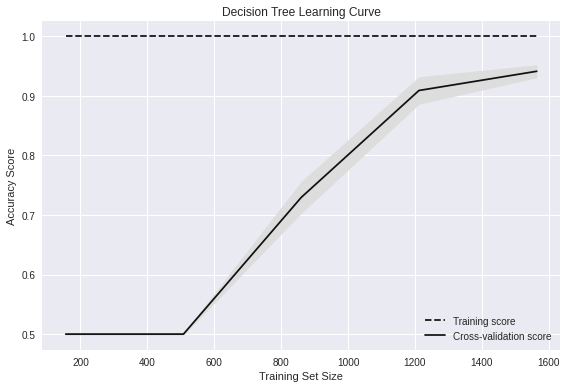

In [360]:
from sklearn.model_selection import learning_curve

    
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(dTree_best_estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.1, 1.0, 5))    

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure()                                                        
                                                        
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Decision Tree > complexity curve (validation curve) 

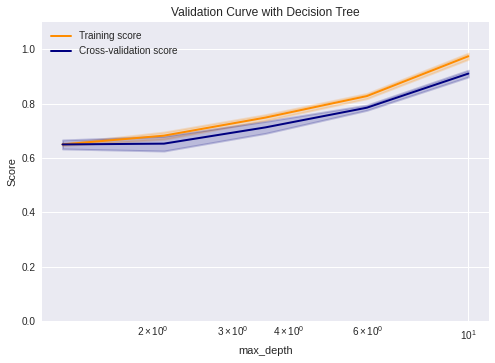

In [361]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

param_range = np.logspace(0.1, 1.0, 5)
train_scores, test_scores = validation_curve(
    dTree_best_estimator, X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel(r"max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# KNN
#### (Luqman)

(k-Nearest Neighbour) KNN represents a supervised classification algorithm that will give new data points accordingly to the k number or the closest data points, while k-means clustering is an unsupervised clustering algorithm that gathers and groups data into k number of clusters.

# Reference: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a


In [362]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

y_train= y_train.astype(int)
X_train= X_train.astype(int)
y_test= y_test.astype(int)
X_test= X_test.astype(int)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [363]:
#show first 10 model predictions on the test data
knn.predict(X_test)[0:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [364]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6689342403628118

In [365]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.84482759 0.82471264 0.83045977 0.85302594 0.80691643]
cv_scores mean:0.8319884726224783


##Hyper Parameters

In [366]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
model = KNeighborsClassifier()

#https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
#https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6

#metric [manhattan, minkowski, euclidean]
#Parameter ‘leaf_size‘ is the size of leaf in kd_tree or ball_tree.

#Hyper Parameters Set
params = {'n_neighbors': np.arange(1, 10),
          'leaf_size':[1,2,3,5,10],
          'metric':['manhattan'],
          'weights':['uniform'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[1]}

#Making models with hyper parameters sets
knn_gscv = GridSearchCV(model, param_grid=params)
#Learning
knn_gscv.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",knn_gscv.best_params_)

#Prediction
prediction=knn_gscv.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:", metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n", metrics.confusion_matrix(prediction,y_test))


Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'metric': 'manhattan', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.7664399092970522
Confusion Metrix:
 [[321  60]
 [ 43  17]]


In [367]:
knn_gscv.best_params_

{'algorithm': 'brute',
 'leaf_size': 1,
 'metric': 'manhattan',
 'n_jobs': 1,
 'n_neighbors': 1,
 'weights': 'uniform'}

In [368]:
knn_gscv.best_score_

0.9182963993507569

In [369]:
knn_best_estimator = knn_gscv.best_estimator_
knn_best_estimator
knn_best_estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

# KNN > Complexity Curve

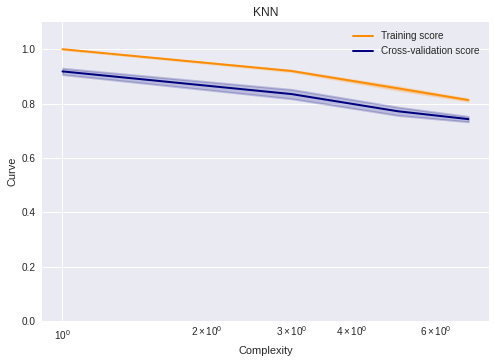

In [370]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.arange(1,9,2)
train_scores, test_scores = validation_curve(knn_best_estimator, 
                                             X_train, y_train,
                                             param_name='n_neighbors',
                                             param_range=param_range,
                                             cv = 5,
                                             scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("KNN")
plt.xlabel("Complexity")
plt.ylabel("Curve")

plt.ylim(0.0, 1.1)
lw = 2

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


# KNN > Learning Curve

In [371]:
def plot_curve():
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    
    # model = KNeighborsClassifier(n_neighbors=1) 
    # model.fit(X_train, y_train)
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(knn_best_estimator,
                                                            X_train,
                                                            y_train,
                                                            n_jobs=1,
                                                            cv=5,
                                                            train_sizes=np.linspace(0.01, 1.0, 5),
                                                            verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.show()
    


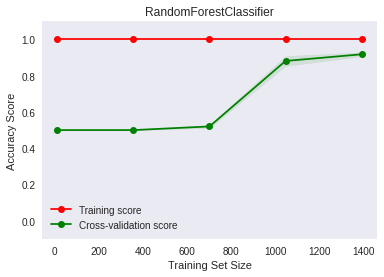

In [372]:
%matplotlib inline
plot_curve()

# SVM -- Support vector machine

#### (Taha)

In [373]:
##supervised
##https://towardsdatascience.com/predict-employee-turnover-with-python-da4975588aa3
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [374]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.683


# SVM > Hyperparameter Tuning

In [375]:
##https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
##https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769 
from sklearn.model_selection import GridSearchCV 
  
  #rbf
  ##Radial basis function kernel. In machine learning, the radial basis function kernel, 
  #or RBF kernel, is a popular kernel function used in various kernelized learning algorithms.
   #In particular, it is commonly used in support vector machine classification.
##https://en.wikipedia.org/w/index.php?title=Radial_basis_function_kernel&action=history

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

#gamma
#gamma is a parameter for non linear hyperplanes. 
#The higher the gamma value it tries to exactly fit the training data set


#C
#C is the penalty parameter of the error term. It controls the trade off between smooth
# decision boundary and classifying the training points correctly.

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train,y_train)

svm_best_estimator = grid.best_estimator_

print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, grid.predict(X_test))))

##print(grid.best_params_) 
##print(grid.best_estimator_) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.718, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.507, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.718, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.716, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.988, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.507, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   17.2s finished


In [376]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [377]:
grid.best_score_

0.9954022988505746

In [378]:
#Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data)

param_grid = { 
              'kernel': ['linear']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train,y_train)

print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, grid.predict(X_test))))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... kernel=linear, score=0.764, total= 2.7min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.721, total= 2.9min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.750, total= 6.5min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.729, total= 5.0min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.723, total= 3.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.1min finished


Support vector machine accuracy: 0.624


In [379]:
grid.best_params_

{'kernel': 'linear'}

In [380]:
grid.best_score_

0.7376163503262778

In [381]:

param_grid = { 'degree':[0, 1, 2, 3, 4, 5, 6],
              'kernel': ['poly']} 


#poly
#polynomial kernel is a kernel function commonly used with support
#vector machines (SVMs) and other kernelized models, 
#that represents the similarity of vectors (training samples) in 
#a feature space over polynomials of the original variables, allowing learning of non-linear models
#https://en.wikipedia.org/wiki/Polynomial_kernel#:~:text=In%20machine%20learning%2C%20the%20polynomial,learning%20of%20non%2Dlinear%20models.


#degree
#degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of 
#the polynomial used to find the hyperplane to split the data.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train,y_train)

print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, grid.predict(X_test))))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] degree=0, kernel=poly ...........................................
[CV] ............... degree=0, kernel=poly, score=0.500, total=   0.1s
[CV] degree=0, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............... degree=0, kernel=poly, score=0.500, total=   0.1s
[CV] degree=0, kernel=poly ...........................................
[CV] ............... degree=0, kernel=poly, score=0.500, total=   0.1s
[CV] degree=0, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ............... degree=0, kernel=poly, score=0.499, total=   0.1s
[CV] degree=0, kernel=poly ...........................................
[CV] ............... degree=0, kernel=poly, score=0.499, total=   0.1s
[CV] degree=1, kernel=poly ...........................................
[CV] ............... degree=1, kernel=poly, score=0.537, total=   0.1s
[CV] degree=1, kernel=poly ...........................................
[CV] ............... degree=1, kernel=poly, score=0.575, total=   0.1s
[CV] degree=1, kernel=poly ...........................................
[CV] ............... degree=1, kernel=poly, score=0.546, total=   0.1s
[CV] degree=1, kernel=poly ...........................................
[CV] ............... degree=1, kernel=poly, score=0.548, total=   0.1s
[CV] degree=1, kernel=poly ...........................................
[CV] ............... degree=1, kernel=poly, score=0.484, total=   0.1s
[CV] degree=2, kernel=poly ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   10.4s finished


Support vector machine accuracy: 0.306


In [382]:
grid.best_params_

{'degree': 2, 'kernel': 'poly'}

In [383]:
grid.best_score_

0.5402514160787042

#SVM > Complexity Curve

Complexity is expressed in terms of graphical plot, which we call complexity curve. ... Moreover, we show that the complexity curve is an effective tool for reducing the size of the training set (data pruning), allowing to significantly speed up the learning process without compromising classification accuracy.

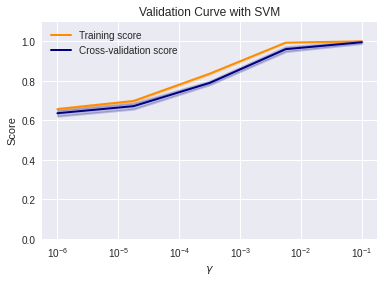

In [384]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X_train, y_train, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# SVM > Learning Curve

Learning curves show the relationship between training set size and your chosen evaluation metric (e.g. RMSE, accuracy, etc.) on your training and validation sets. They can be an extremely useful tool when diagnosing your model performance, as they can tell you whether your model is suffering from bias or variance

In [385]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import explained_variance_score, make_scorer

In [386]:
train_sizes, train_scores, valid_scores = learning_curve( SVC(), X_train, y_train, n_jobs=-1,cv=10, train_sizes=[1, 150, 300, 450, 600,750, 926],verbose=0)




In [387]:
print(learning_curve)

<function learning_curve at 0x7f8a64444f28>


In [388]:
train_scores_mean = train_scores.mean(axis = 1) * 100
validation_scores_mean = valid_scores.mean(axis = 1) * 100
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1            NaN
150          NaN
300          NaN
450          NaN
600          NaN
750          NaN
926    84.460043
dtype: float64

 --------------------

Mean validation scores

 1       NaN
150     NaN
300     NaN
450     NaN
600     NaN
750     NaN
926    50.0
dtype: float64


(0.0, 100.0)

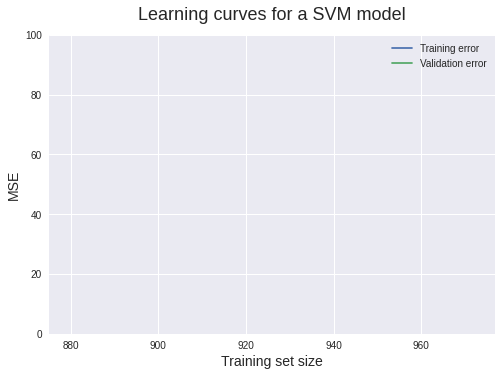

In [389]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100)

# Logistic Regression
#### Jirom

**Logistic** Regression 

 Logistic Regression is basically a predictive model
 analysis technique where the output (target) variables are discrete values 
 for a given set of features or input (X).

In [390]:
from sklearn.linear_model import LogisticRegression

#create the model
logreg = LogisticRegression()
#train the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [391]:
#Predicting the Test Set Result and 
# Check accuracy of the model(Accuracy is the fraction of predictions our model got right.
    
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6984126984126984

In [392]:
# when a positive value is predicted, how often is the prediction correct?

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.32051282051282054

In [393]:
# check recall_score( #Out of all the positive classes, recall is how much we predicted correctly.)

from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.6493506493506493

In [394]:
#check f1_score(It is often convenient to combine precision and recall into a single metric called the F-1 score. 

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4291845493562232

In [395]:
 #check the confusion matrix(It is a table with four different combinations of predicted and actual values in the case for a binary classifier
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test,y_pred)

array([[258, 106],
       [ 27,  50]])

# Hyperparameter tuning

These are adjustable parameters that must be tuned in order to obtain a model with optimal 
 performance or these hyperparameters be fine-tuned in order to obtain the model with the highest quality..


In [396]:
# Repeated K-Fold cross validator
from sklearn.model_selection import RepeatedStratifiedKFold
# Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

#list of solvers,Algorithm to use in the optimization problem 
solvers=['newton-cg','lbfgs','liblinear']

penalty=['l2']
# defining parameter range 
c_values = [100,10,1.0,0.1,0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# CV-used is Stratified K-Folds If an integer is provided, then it is the number of folds used. 
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(model, param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_search.fit(X_train, y_train)

logit_best_estimator = grid_search.best_estimator_

# # summarize results
print("Best: %f using %s"%(grid_search.best_score_,grid_search.best_params_))
print('Accuracy Score: {:.3f}'.format(accuracy_score(y_test, grid_search.predict(X_test))))


Best: 0.753733 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy Score: 0.762


# Logistic Regression > AUC

A plot of the true positive rateagainst the false positive rate at all classificationthresholds. This is used to evaluate the performance of
a classification model at different classificatio thresholds. The area under the ROC curve can beinterpreted as the probability that the model correctly
distinguishes between a randomly chosen positive observation (e.g. “spam”) anda randomly chosennegative observation (e.g. “not spam”).

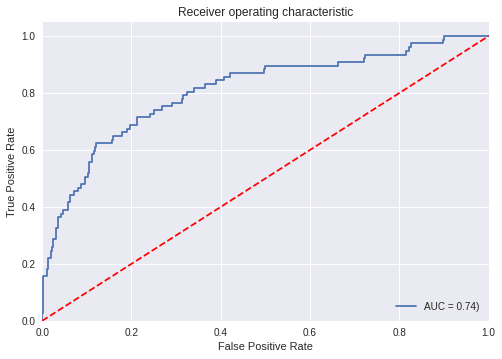

In [397]:
#Build ROC curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, grid_search.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Suppose real output is 1. Classifier said 1. -> True Positive

Suppose real output is 1. Classifier said 0. -> False Positive


# Logistic Regression > Learning Curve

The learning curve It is a tool to find out how much a machine learning model benefits from adding more training data and whether the estimator suffers more from a variance error or a bias error. So we can use it to diagnose the bias-variance tradeoff. plots the score over varying numbers of training samples

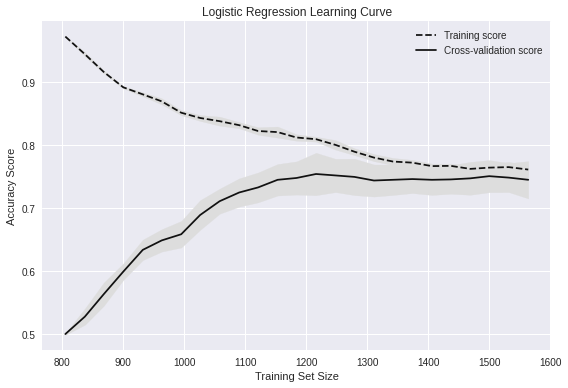

In [398]:
#Do the required imports from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import KFold

    
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(logit_best_estimator, 
                                                         X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))    
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure()                                                        
                                                        
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Logistic Regression > Complexity Curve

validation curve is a tool for finding good hyper parameter settings,plots the score over a varying hyper parameter

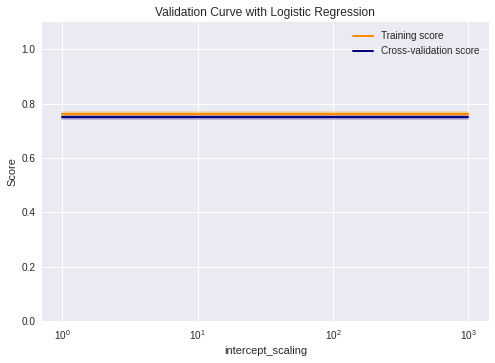

In [399]:
import matplotlib.pyplot as plt
import numpy as np



# solvers=['newton-cg','lbfgs','liblinear']
# penalty=['l2']
# c_values=[100,10,1.0,0.1,0.01]

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

param_range = np.logspace(0, 3, 3)
train_scores, test_scores = validation_curve(
    logit_best_estimator, X_train, y_train, param_name='intercept_scaling', param_range=param_range,
    scoring="accuracy", n_jobs=1)

# Create means and standard deviations of training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# # Create plot

plt.title("Validation Curve with Logistic Regression")
plt.xlabel(r"intercept_scaling")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()




In [400]:
help(validation_curve)

Help on function validation_curve in module sklearn.model_selection._validation:

validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan)
    Validation curve.
    
    Determine training and test scores for varying parameter values.
    
    Compute scores for an estimator with different values of a specified
    parameter. This is similar to grid search with one parameter. However, this
    will also compute training scores and is merely a utility for plotting the
    results.
    
    Read more in the :ref:`User Guide <learning_curve>`.
    
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    

# Ensemble


In [401]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best_estimator), ('svc', svm_best_estimator), ('log_reg', logit_best_estimator),('DecisionTree',dTree_best_estimator)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.8390022675736961

# Comparison between all classifier performance / AUC Curve
#### (Luqman)


### Reference: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

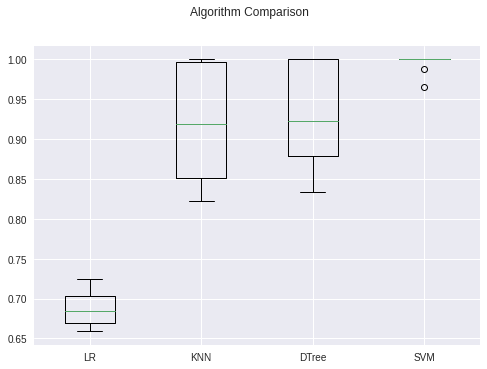

In [402]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn import metrics

seed = 7
# prepare models
models = []
models.append(('LR', logit_best_estimator))
models.append(('KNN', knn_best_estimator))
models.append(('DTree', dTree_best_estimator))
models.append(('SVM', svm_best_estimator))
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
# plt.roc_curve(results)
ax.set_xticklabels(names)
plt.show()



# Bonus: AUTO ML - Auto SKLearn
#### (Luqman + Furkan)

### Reference: https://www.youtube.com/watch?v=uMWJls5Roqs

In [403]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [404]:
import autosklearn.classification
import sklearn.metrics

# configure auto-sklearn
autoClassifier = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=180, # run auto-sklearn for at most 3min
          per_run_time_limit=40, # spend at most 40 sec for each model training
          )

# train model(s)
autoClassifier.fit(X_train, y_train.astype(int))

AutoSklearnClassifier(delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, ml_memory_limit=3072,
                      n_jobs=None, output_folder=None, per_run_time_limit=40,
                      resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=180, tmp_folder=Non

In [405]:
from sklearn.metrics import accuracy_score

#evaluate
y_hat = autoClassifier.predict(X_test)
test_acc = accuracy_score(y_test.astype(int), y_hat)
print("Test Accuracy score {0}".format(test_acc))

Test Accuracy score 0.8458049886621315


In [406]:
autoClassifier.show_models()

"[(0.660000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'fast_ica', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 1.117891964153124, 'classifier:adaboost:max_depth': 7, 'classifier:adaboost:n_estimators': 350, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.099090775365223, 'feature_preprocessor:fast_ica:algorithm': 'parallel', 'feature_preprocessor:fast_ica:fun': 'exp', 'feature_preprocessor:fast_ica:whiten': 'True', 'feature_preprocessor:fast_ica:n_components': 112

In [407]:
print(autoClassifier.sprint_statistics())

auto-sklearn results:
  Dataset name: 9b98b366fe99e6bcd4bb57fe07c122fe
  Metric: accuracy
  Best validation score: 0.987805
  Number of target algorithm runs: 10
  Number of successful target algorithm runs: 6
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0

